In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression      
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data['family_count'] = data['sibsp'] + data['parch'] + 1

In [4]:
data.drop(columns=['deck', 'alone', 'class', 'adult_male', 'alive', 'embark_town', 'who', 'sibsp', 'parch'], inplace=True)
data.head()

,survived,pclass,sex,age,fare,embarked,family_count
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   sex           891 non-null    object 
 3   age           714 non-null    float64
 4   fare          891 non-null    float64
 5   embarked      889 non-null    object 
 6   family_count  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [6]:
# simmple fill
data['age'].fillna(data['age'].mean(), inplace=True)            # fill with mean
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)  # fill with mode

/tmp/ipykernel_77434/2390732768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)            # fill with mean
/tmp/ipykernel_77434/2390732768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [7]:
data.head()

,survived,pclass,sex,age,fare,embarked,family_count
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   sex           891 non-null    object 
 3   age           891 non-null    float64
 4   fare          891 non-null    float64
 5   embarked      891 non-null    object 
 6   family_count  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [9]:
data.duplicated().sum()

np.int64(112)

In [10]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      779 non-null    int64  
 1   pclass        779 non-null    int64  
 2   sex           779 non-null    object 
 3   age           779 non-null    float64
 4   fare          779 non-null    float64
 5   embarked      779 non-null    object 
 6   family_count  779 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.7+ KB


In [12]:
data.shape

(779, 7)

In [13]:
# Label Encoding
data['sex'] = data['sex'].replace({'male': 1, 'female': 0})
data['embarked'] = data['embarked'].replace({'S': 0, 'Q': 1, 'C': 2})

/tmp/ipykernel_77434/2078531015.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 1, 'female': 0})
/tmp/ipykernel_77434/2078531015.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['embarked'] = data['embarked'].replace({'S': 0, 'Q': 1, 'C': 2})


In [14]:
x = data.drop('survived', axis=1)
y = data['survived']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
data.head()

,survived,pclass,sex,age,fare,embarked,family_count
0,0,3,1,22.0,7.2500,0,2
1,1,1,0,38.0,71.2833,2,2
2,1,3,0,26.0,7.9250,0,1
3,1,1,0,35.0,53.1000,0,2
4,0,3,1,35.0,8.0500,0,1


In [17]:
x

,pclass,sex,age,fare,embarked,family_count
0,3,1,22.000000,7.2500,0,2
1,1,0,38.000000,71.2833,2,2
2,3,0,26.000000,7.9250,0,1
3,1,0,35.000000,53.1000,0,2
4,3,1,35.000000,8.0500,0,1
...,...,...,...,...,...,...
885,3,0,39.000000,29.1250,1,6
887,1,0,19.000000,30.0000,0,1
888,3,0,29.699118,23.4500,0,4
889,1,1,26.000000,30.0000,2,1


In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(x_test)

In [24]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}")

Accuracy: 82.69


In [26]:
# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[80, 13],
       [14, 49]])

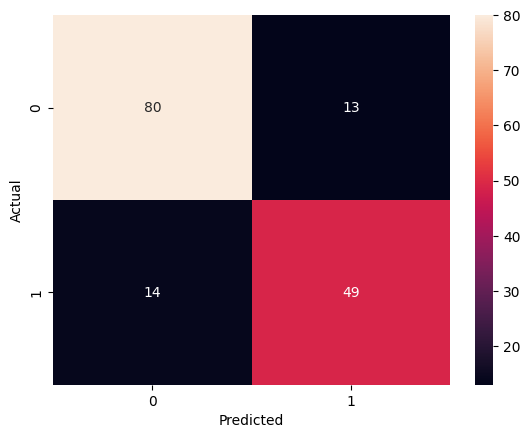

In [27]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()